### Executive Summary

* Model 1 presented a 61%/62% train/test accuracy with 6 features from cap surface and cap shape with 3 hidden layers.
* Model 2 presented a 99%/99% train/test accuracy with 15 features from cap surface, cap shape, habitat, and odor with 3 hidden layers.
* Model 3 presented a 98%/99% train/test accuracy with 15 features from cap surface, cap shape, habitat, and odor with 4 hidden layers.
* Based on crosstab/visualization analysis (see Appendix), odor seems to be the strongest indicator of poisonous mushrooms.

My recommendation is use model 2 as it returns the highest accuracy in determining if a mushroom is poisonous or edible.

### Preliminary Analysis

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.warnings.filterwarnings('ignore')
sns.set()

df = pd.read_csv('/Users/drewmcknight1/Desktop/MISY630/Fall 2020 Course Files/Assignments/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [56]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [57]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [58]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


#### Model 1

In [59]:
mushrooms = df[['class', 'cap-surface', 'cap-shape']].copy()
mushrooms['class'] = [1 if i == 'p' else 0 for i in mushrooms['class']]
mushrooms = pd.get_dummies(mushrooms)
mushrooms.head()

,class,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,1,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,1


In [60]:
mushrooms.columns

Index(['class', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s',
       'cap-surface_y', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x'],
      dtype='object')

In [61]:
X = mushrooms[['cap-surface_f', 'cap-surface_g','cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s']].copy()
y = mushrooms['class'].copy()

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, \
        random_state = 0)

In [63]:
X_train.shape[1]

6

In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization

In [65]:
model = Sequential() #1

# NOTE: Use the number from the above shape command in the following statement
# input_dim refers to number of nodes in the input layer.  Number after Dense 
# refers to number of neurons/nodes in the hidden layer
# input and hidden layer #1.  Use relu, which is common for hidden layers
model.add(Dense(12, activation='relu', input_dim=6, name='first_hidden')) 
model.add(Dropout(0.2))

# Re-centers the results to insure they dont drift
model.add(BatchNormalization())

# second hidden layer.  Use relu
model.add(Dense(10, activation = 'relu', name='second_hidden'))

# Re-centers the results to insure they dont drift
model.add(BatchNormalization())

# third hidden layer.  Use relu
model.add(Dense(10, activation = 'relu', name='third_hidden'))

# Re-centers the results to insure they dont drift
model.add(BatchNormalization())

model.add(Dropout(0.2))

# output layer: use sigmoid since outputting a probability. Only one node
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden (Dense)         (None, 12)                84        
_________________________________________________________________
dropout_7 (Dropout)          (None, 12)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 12)                48        
_________________________________________________________________
second_hidden (Dense)        (None, 10)                130       
_________________________________________________________________
batch_normalization_12 (Batc (None, 10)                40        
_________________________________________________________________
third_hidden (Dense)         (None, 10)                110       
_________________________________________________________________
batch_normalization_13 (Batc (None, 10)                40        
__________

In [66]:
# Compile the model....check for errors
model.compile(loss='binary_crossentropy', optimizer='adam', \
              metrics=['accuracy', 'mean_squared_error'])

In [67]:
model.fit(X_train, y_train, batch_size = 10, epochs = 25, verbose=2)

Epoch 1/25
 - 4s - loss: 0.7359 - acc: 0.5402 - mean_squared_error: 0.2645
Epoch 2/25
 - 2s - loss: 0.6966 - acc: 0.5536 - mean_squared_error: 0.2502
Epoch 3/25
 - 2s - loss: 0.6871 - acc: 0.5641 - mean_squared_error: 0.2464
Epoch 4/25
 - 2s - loss: 0.6756 - acc: 0.5696 - mean_squared_error: 0.2411
Epoch 5/25
 - 2s - loss: 0.6752 - acc: 0.5741 - mean_squared_error: 0.2411
Epoch 6/25
 - 2s - loss: 0.6708 - acc: 0.5849 - mean_squared_error: 0.2389
Epoch 7/25
 - 2s - loss: 0.6698 - acc: 0.5826 - mean_squared_error: 0.2385
Epoch 8/25
 - 2s - loss: 0.6718 - acc: 0.5841 - mean_squared_error: 0.2395
Epoch 9/25
 - 2s - loss: 0.6696 - acc: 0.5813 - mean_squared_error: 0.2385
Epoch 10/25
 - 2s - loss: 0.6680 - acc: 0.5921 - mean_squared_error: 0.2377
Epoch 11/25
 - 2s - loss: 0.6659 - acc: 0.5875 - mean_squared_error: 0.2367
Epoch 12/25
 - 2s - loss: 0.6697 - acc: 0.5864 - mean_squared_error: 0.2385
Epoch 13/25
 - 2s - loss: 0.6643 - acc: 0.5944 - mean_squared_error: 0.2359
Epoch 14/25
 - 2s - l

In [68]:
pred_classes = model.predict_classes(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_classes)

array([[2474,  882],
       [1667, 1476]])

In [69]:
print(model.predict(X_train))

[[0.7414007 ]
 [0.3409124 ]
 [0.452333  ]
 ...
 [0.452333  ]
 [0.33785862]
 [0.452333  ]]


In [70]:
loss, accuracy, mse = model.evaluate(X_train,y_train)
print("The model loss is {:.2f}, its accuracy is {:.2f}, and mse is {:.2f}. ".format(\
            loss,accuracy, mse))

6499/6499 [==============================] - 1s 84us/step
The model loss is 0.66, its accuracy is 0.61, and mse is 0.23. 


In [71]:
from sklearn.metrics import classification_report
target_names=['edible','poisonous'] # b/c 0=edible, 1=poisonous
print(classification_report(y_train, pred_classes, target_names=target_names))

             precision    recall  f1-score   support

     edible       0.60      0.74      0.66      3356
  poisonous       0.63      0.47      0.54      3143

avg / total       0.61      0.61      0.60      6499



In [72]:
pred_classes = model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_classes)

array([[654, 198],
       [420, 353]])

* 852 mushrooms that are edible
* 773 mushrooms that are poisonous
* when the model predicts mushrooms are edible, it is accurate 654/1074 or 61% of the time
* when the model predicts mushrooms are poisonous, it is accurate 198/551 or 36% of the time
* When the mushroom is actually edible, it is accurate 654/852 or 77% of the time.
* When the mushroom is actually poisonous, it is accurate (1-(420/773))*100 or 46% of the time.

In [73]:
loss, accuracy, mse = model.evaluate(X_test,y_test)
print("The model loss is {:.2f} and its accuracy is {:.2f}., and mse is {:.2f}. ".format(loss, accuracy, mse))

1625/1625 [==============================] - 0s 31us/step
The model loss is 0.65 and its accuracy is 0.62., and mse is 0.23. 


In [74]:
from sklearn.metrics import classification_report
target_names=['edible','poisonous'] # b/c 0=edible, 1=poisonous
print(classification_report(y_test, pred_classes, target_names=target_names))

             precision    recall  f1-score   support

     edible       0.61      0.77      0.68       852
  poisonous       0.64      0.46      0.53       773

avg / total       0.62      0.62      0.61      1625



In [75]:
print(model.predict(X_test))

[[0.452333 ]
 [0.5403097]
 [0.452333 ]
 ...
 [0.5403097]
 [0.452333 ]
 [0.452333 ]]


Based on this model, mushrooms with cap surfaces that are fibrous or with grooves as well as cap shapes that are conical, flat, knobbed, or sunken are more likely to be edible.

#### Model 2

In [76]:
mushrooms2 = df[['class', 'cap-surface', 'cap-shape', 'odor', 'habitat']].copy()
mushrooms2['class'] = [1 if i == 'p' else 0 for i in mushrooms2['class']]
mushrooms2 = pd.get_dummies(mushrooms2)
mushrooms2.head()

,class,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,odor_p,odor_s,odor_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
mushrooms2.columns

Index(['class', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s',
       'cap-surface_y', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y',
       'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p',
       'habitat_u', 'habitat_w'],
      dtype='object')

In [78]:
X2 = mushrooms2[['cap-surface_f', 'cap-surface_g','cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n',
       'habitat_d', 'habitat_g', 'habitat_l']].copy()
y2 = mushrooms2['class'].copy()

In [79]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, \
        random_state = 0)

In [80]:
X_train2.shape[1]

15

In [81]:
model2 = Sequential() #1

# NOTE: Use the number from the above shape command in the following statement
# input_dim refers to number of nodes in the input layer.  Number after Dense 
# refers to number of neurons/nodes in the hidden layer
# input and hidden layer #1.  Use relu, which is common for hidden layers
model2.add(Dense(12, activation='relu', input_dim=15, name='first_hidden')) 
model2.add(Dropout(0.2))

# Re-centers the results to insure they dont drift
model2.add(BatchNormalization())

# second hidden layer.  Use relu
model2.add(Dense(10, activation = 'relu', name='second_hidden'))

# Re-centers the results to insure they dont drift
model2.add(BatchNormalization())

# third hidden layer.  Use relu
model2.add(Dense(10, activation = 'relu', name='third_hidden'))

# Re-centers the results to insure they dont drift
model2.add(BatchNormalization())

model2.add(Dropout(0.2))

# output layer: use sigmoid since outputting a probability. Only one node
model2.add(Dense(1, activation='sigmoid', name='output'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden (Dense)         (None, 12)                192       
_________________________________________________________________
dropout_9 (Dropout)          (None, 12)                0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 12)                48        
_________________________________________________________________
second_hidden (Dense)        (None, 10)                130       
_________________________________________________________________
batch_normalization_15 (Batc (None, 10)                40        
_________________________________________________________________
third_hidden (Dense)         (None, 10)                110       
_________________________________________________________________
batch_normalization_16 (Batc (None, 10)                40        
__________

In [82]:
model2.compile(loss='binary_crossentropy', optimizer='adam', \
              metrics=['accuracy', 'mean_squared_error'])

In [83]:
model2.fit(X_train2, y_train2, batch_size = 10, epochs = 25, verbose=2)

Epoch 1/25
 - 4s - loss: 0.4281 - acc: 0.8137 - mean_squared_error: 0.1360
Epoch 2/25
 - 2s - loss: 0.2006 - acc: 0.9345 - mean_squared_error: 0.0538
Epoch 3/25
 - 2s - loss: 0.1573 - acc: 0.9543 - mean_squared_error: 0.0383
Epoch 4/25
 - 2s - loss: 0.1355 - acc: 0.9660 - mean_squared_error: 0.0316
Epoch 5/25
 - 2s - loss: 0.1409 - acc: 0.9655 - mean_squared_error: 0.0319
Epoch 6/25
 - 2s - loss: 0.1318 - acc: 0.9701 - mean_squared_error: 0.0278
Epoch 7/25
 - 2s - loss: 0.1113 - acc: 0.9766 - mean_squared_error: 0.0233
Epoch 8/25
 - 2s - loss: 0.1097 - acc: 0.9771 - mean_squared_error: 0.0226
Epoch 9/25
 - 2s - loss: 0.1158 - acc: 0.9752 - mean_squared_error: 0.0242
Epoch 10/25
 - 2s - loss: 0.1134 - acc: 0.9754 - mean_squared_error: 0.0244
Epoch 11/25
 - 2s - loss: 0.1147 - acc: 0.9760 - mean_squared_error: 0.0234
Epoch 12/25
 - 2s - loss: 0.1172 - acc: 0.9734 - mean_squared_error: 0.0249
Epoch 13/25
 - 2s - loss: 0.0986 - acc: 0.9785 - mean_squared_error: 0.0210
Epoch 14/25
 - 2s - l

In [84]:
pred_classes = model2.predict_classes(X_train2)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train2,pred_classes)

array([[3356,    0],
       [  95, 3048]])

In [85]:
print(model2.predict(X_train2))

[[0.03517738]
 [0.00890152]
 [0.00584063]
 ...
 [0.07024593]
 [0.03224472]
 [0.04279618]]


In [86]:
loss, accuracy, mse = model2.evaluate(X_train2,y_train2)
print("The model loss is {:.2f}, its accuracy is {:.2f}, and mse is {:.2f}. ".format(\
            loss,accuracy, mse))

6499/6499 [==============================] - 1s 89us/step
The model loss is 0.06, its accuracy is 0.99, and mse is 0.01. 


In [87]:
from sklearn.metrics import classification_report
target_names=['edible','poisonous'] # b/c 0=edible, 1=poisonous
print(classification_report(y_train2, pred_classes, target_names=target_names))

             precision    recall  f1-score   support

     edible       0.97      1.00      0.99      3356
  poisonous       1.00      0.97      0.98      3143

avg / total       0.99      0.99      0.99      6499



In [88]:
pred_classes = model2.predict_classes(X_test2)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2,pred_classes)

array([[852,   0],
       [ 18, 755]])

* 852 mushrooms that are edible
* 773 mushrooms that are poisonous
* when the model predicts mushrooms are edible, it is accurate 852/870 or 98% of the time
* when the model predicts mushrooms are poisonous, it is accurate 0/755 or 0% of the time.
* When the mushroom is actually edible, it is accurate 852/852 or 100% of the time.
* When the mushroom is actually poisonous, it is accurate (1-(18/773))*100 or 98% of the time.

In [89]:
loss, accuracy, mse = model2.evaluate(X_test2,y_test2)
print("The model loss is {:.2f} and its accuracy is {:.2f}., and mse is {:.2f}. ".format(loss, accuracy, mse))

1625/1625 [==============================] - 0s 30us/step
The model loss is 0.05 and its accuracy is 0.99., and mse is 0.01. 


In [90]:
from sklearn.metrics import classification_report
target_names=['edible','poisonous'] # b/c 0=edible, 1=poisonous
print(classification_report(y_test2, pred_classes, target_names=target_names))

             precision    recall  f1-score   support

     edible       0.98      1.00      0.99       852
  poisonous       1.00      0.98      0.99       773

avg / total       0.99      0.99      0.99      1625



In [91]:
print(model2.predict(X_test2))

[[0.996555  ]
 [0.04224996]
 [0.02911366]
 ...
 [0.99913484]
 [0.02911366]
 [0.04279618]]


Based on this model, the following are more likely to be poisonous: 
* cap surfaces that are fibrous or with grooves. 
* cap shapes that are conical, flat, knobbed, or sunken
* odors that are almond, creosote, foul, anise, musty, or none
* habitats that are woods, grasses, or leaves

#### Model 3

In [92]:
mushrooms3 = df[['class', 'cap-surface', 'cap-shape', 'odor', 'habitat']].copy()
mushrooms3['class'] = [1 if i == 'p' else 0 for i in mushrooms3['class']]
mushrooms3 = pd.get_dummies(mushrooms3)
mushrooms3.head()

,class,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,odor_p,odor_s,odor_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [93]:
mushrooms3.columns

Index(['class', 'cap-surface_f', 'cap-surface_g', 'cap-surface_s',
       'cap-surface_y', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y',
       'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p',
       'habitat_u', 'habitat_w'],
      dtype='object')

In [94]:
X3 = mushrooms3[['cap-surface_f', 'cap-surface_g','cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'odor_a', 'odor_c',
       'odor_f', 'odor_l', 'odor_m', 'odor_n',
       'habitat_d', 'habitat_g', 'habitat_l']].copy()
y3 = mushrooms3['class'].copy()

In [95]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, \
        random_state = 0)

In [96]:
X_train3.shape[1]

15

In [97]:
model3 = Sequential() #1

# NOTE: Use the number from the above shape command in the following statement
# input_dim refers to number of nodes in the input layer.  Number after Dense 
# refers to number of neurons/nodes in the hidden layer
# input and hidden layer #1.  Use relu, which is common for hidden layers
model3.add(Dense(10, activation='relu', input_dim=15, name='first_hidden')) 
model3.add(Dropout(0.2))

# Re-centers the results to insure they dont drift
model3.add(BatchNormalization())

# second hidden layer.  Use relu
model3.add(Dense(10, activation = 'relu', name='second_hidden'))

# Re-centers the results to insure they dont drift
model3.add(BatchNormalization())

# third hidden layer.  Use relu
model3.add(Dense(10, activation = 'relu', name='third_hidden'))

# Re-centers the results to insure they dont drift
model3.add(BatchNormalization())

model3.add(Dropout(0.2))

model3.add(Dense(10, activation = 'relu', name='fourth_hidden'))

model3.add(BatchNormalization())


# output layer: use sigmoid since outputting a probability. Only one node
model3.add(Dense(1, activation='sigmoid', name='output'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden (Dense)         (None, 10)                160       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 10)                40        
_________________________________________________________________
second_hidden (Dense)        (None, 10)                110       
_________________________________________________________________
batch_normalization_18 (Batc (None, 10)                40        
_________________________________________________________________
third_hidden (Dense)         (None, 10)                110       
_________________________________________________________________
batch_normalization_19 (Batc (None, 10)                40        
__________

In [98]:
model3.compile(loss='binary_crossentropy', optimizer='adam', \
              metrics=['accuracy', 'mean_squared_error'])

In [99]:
model3.fit(X_train3, y_train3, batch_size = 10, epochs = 25, verbose=2)

Epoch 1/25
 - 5s - loss: 0.4831 - acc: 0.7672 - mean_squared_error: 0.1583
Epoch 2/25
 - 2s - loss: 0.2813 - acc: 0.8998 - mean_squared_error: 0.0792
Epoch 3/25
 - 2s - loss: 0.2205 - acc: 0.9291 - mean_squared_error: 0.0583
Epoch 4/25
 - 2s - loss: 0.1907 - acc: 0.9448 - mean_squared_error: 0.0478
Epoch 5/25
 - 2s - loss: 0.1729 - acc: 0.9497 - mean_squared_error: 0.0426
Epoch 6/25
 - 2s - loss: 0.1749 - acc: 0.9546 - mean_squared_error: 0.0410
Epoch 7/25
 - 2s - loss: 0.1447 - acc: 0.9635 - mean_squared_error: 0.0327
Epoch 8/25
 - 2s - loss: 0.1291 - acc: 0.9708 - mean_squared_error: 0.0286
Epoch 9/25
 - 2s - loss: 0.1291 - acc: 0.9717 - mean_squared_error: 0.0278
Epoch 10/25
 - 2s - loss: 0.1097 - acc: 0.9754 - mean_squared_error: 0.0236
Epoch 11/25
 - 2s - loss: 0.1157 - acc: 0.9731 - mean_squared_error: 0.0248
Epoch 12/25
 - 2s - loss: 0.1158 - acc: 0.9748 - mean_squared_error: 0.0241
Epoch 13/25
 - 2s - loss: 0.1053 - acc: 0.9769 - mean_squared_error: 0.0224
Epoch 14/25
 - 2s - l

In [100]:
pred_classes = model3.predict_classes(X_train3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train3,pred_classes)

array([[3356,    0],
       [  98, 3045]])

In [101]:
print(model3.predict(X_train3))

[[0.06082488]
 [0.048743  ]
 [0.04165018]
 ...
 [0.06034152]
 [0.04145377]
 [0.05316707]]


In [102]:
loss, accuracy, mse = model3.evaluate(X_train3,y_train3)
print("The model loss is {:.2f}, its accuracy is {:.2f}, and mse is {:.2f}. ".format(\
            loss,accuracy, mse))

6499/6499 [==============================] - 1s 119us/step
The model loss is 0.08, its accuracy is 0.98, and mse is 0.01. 


In [103]:
from sklearn.metrics import classification_report
target_names=['edible','poisonous'] # b/c 0=edible, 1=poisonous
print(classification_report(y_train3, pred_classes, target_names=target_names))

             precision    recall  f1-score   support

     edible       0.97      1.00      0.99      3356
  poisonous       1.00      0.97      0.98      3143

avg / total       0.99      0.98      0.98      6499



In [104]:
pred_classes = model3.predict_classes(X_test3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test3,pred_classes)

array([[852,   0],
       [ 18, 755]])

* 852 mushrooms that are edible
* 773 mushrooms that are poisonous
* when the model predicts mushrooms are edible, it is accurate 852/870 or 98% of the time
* when the model predicts mushrooms are poisonous, it is accurate 0/755 or 0% of the time.
* When the mushroom is actually edible, it is accurate 852/852 or 100% of the time.
* When the mushroom is actually poisonous, it is accurate (1-(18/773))*100 or 98% of the time.

In [105]:
loss, accuracy, mse = model3.evaluate(X_test3,y_test3)
print("The model loss is {:.2f} and its accuracy is {:.2f}., and mse is {:.2f}. ".format(loss, accuracy, mse))

1625/1625 [==============================] - 0s 38us/step
The model loss is 0.06 and its accuracy is 0.99., and mse is 0.01. 


In [106]:
from sklearn.metrics import classification_report
target_names=['edible','poisonous'] # b/c 0=edible, 1=poisonous
print(classification_report(y_test3, pred_classes, target_names=target_names))

             precision    recall  f1-score   support

     edible       0.98      1.00      0.99       852
  poisonous       1.00      0.98      0.99       773

avg / total       0.99      0.99      0.99      1625



In [107]:
print(model3.predict(X_test3))

[[0.97217697]
 [0.05619944]
 [0.04356334]
 ...
 [0.99106544]
 [0.04356334]
 [0.05316707]]


Based on this model, the following are more likely to be poisonous:

* cap surfaces that are fibrous or with grooves.
* cap shapes that are conical, flat, knobbed, or sunken
* odors that are almond, creosote, foul, anise, musty, or none
* habitats that are woods, grasses, or leaves

### Model Architecture/Results

| Model | # of Features | # of Neurons | # of Hidden Layers | # of Epochs | Activation Functions Used | Optimizer | Train/Test Accuracy
| ---: | ---: | ---: | ---: | ---: | ---: | ---: | ---: |
| 1 | 6 | 12 - layer 1, 10 - layer 2, 10 - layer 3 | 3 | 25 | relu, sigmoid | Adam | 61%/62% |
| 2 | 15 | 12 - layer 1, 10 - layer 2, 10 - layer 3 | 3 | 25 | relu, sigmoid | Adam | 99%/99% |
| 3 | 15| 10 - layer 1, 10 - layer 2, 10 - layer 3, 10 - layer 4 | 4 | 25 | relu, sigmoid | Adam | 98%/99% |

The "best" model is model 2 due to returning a 99% accuracy for train/test in determining a mushroom is poisonous. I used relu and sigmoid for all 3 models due to Relu being the most common activation function to use and sigmoid since the output is a single probability value that represents p(poisonous).

### Appendix

In [584]:
%%html
<style>
table {float:left}
</style>

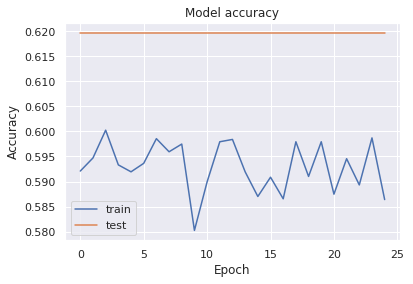

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline 

history = model.fit(X_train, y_train, batch_size = 10, validation_data=(X_test, y_test), epochs = 25, verbose=0)

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

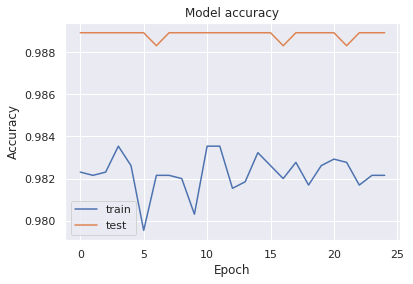

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline 

history = model2.fit(X_train2, y_train2, batch_size = 10, validation_data=(X_test2, y_test2), epochs = 25, verbose=0)

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

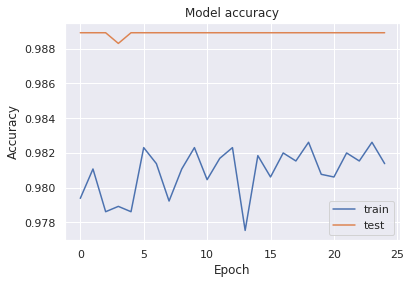

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline 

history = model3.fit(X_train3, y_train3, batch_size = 10, validation_data=(X_test3, y_test3), epochs = 25, verbose=0)

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [588]:
pd.crosstab(df['class'], df['cap-shape'])

cap-shape,b,c,f,k,s,x
class,,,,,,
e,404,0,1596,228,32,1948
p,48,4,1556,600,0,1708


In [589]:
pd.crosstab(df['class'], df['cap-surface'])

cap-surface,f,g,s,y
class,,,,
e,1560,0,1144,1504
p,760,4,1412,1740


In [590]:
pd.crosstab(df['class'], df['gill-color'])

gill-color,b,e,g,h,k,n,o,p,r,u,w,y
class,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64
p,1728,0,504,528,64,112,0,640,24,48,246,22


In [591]:
pd.crosstab(df['class'], df['gill-spacing'])

gill-spacing,c,w
class,,
e,3008,1200
p,3804,112


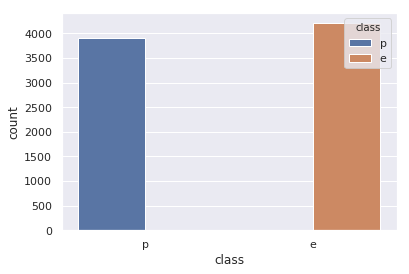

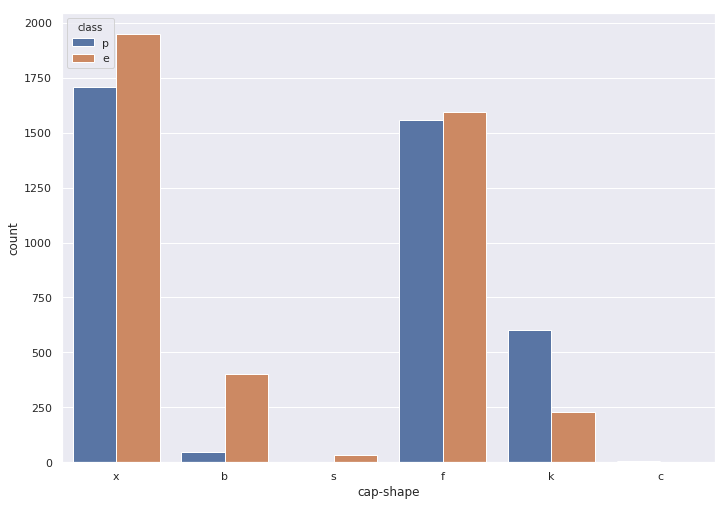

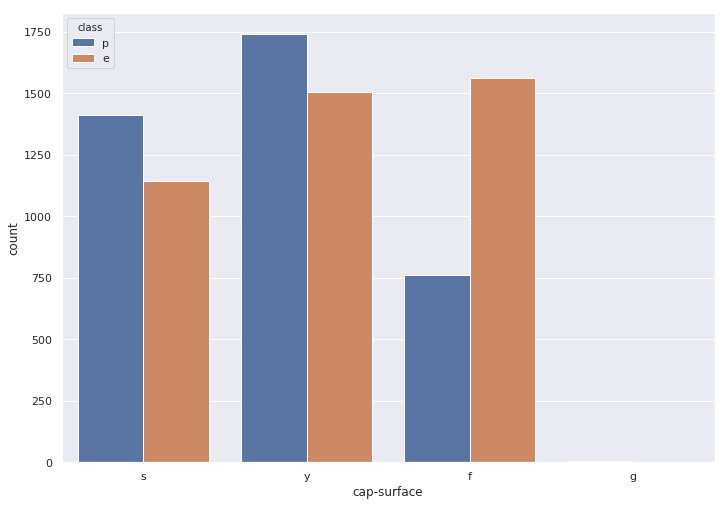

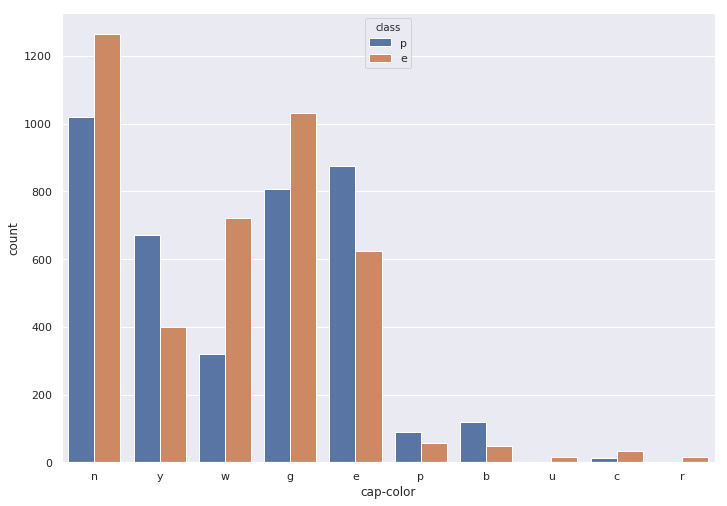

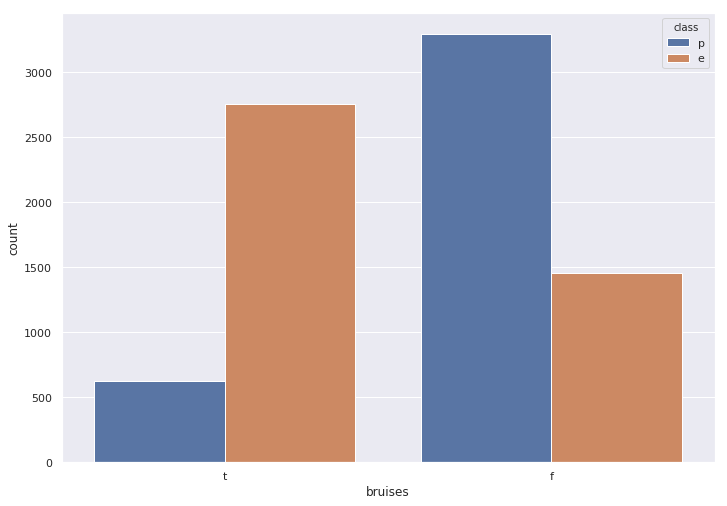

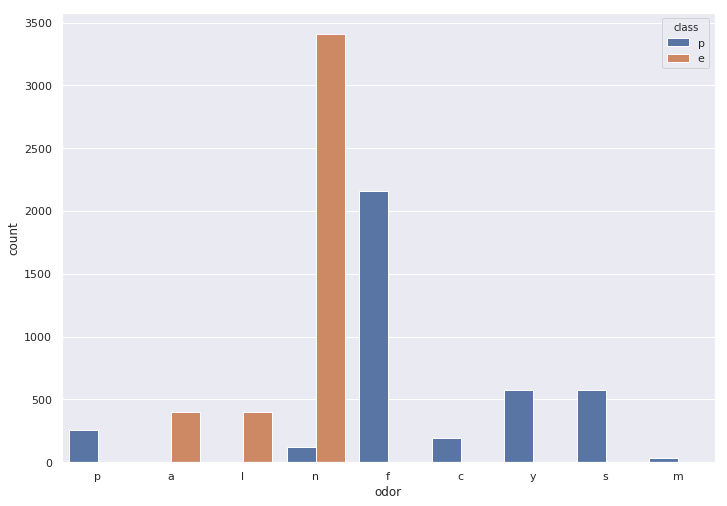

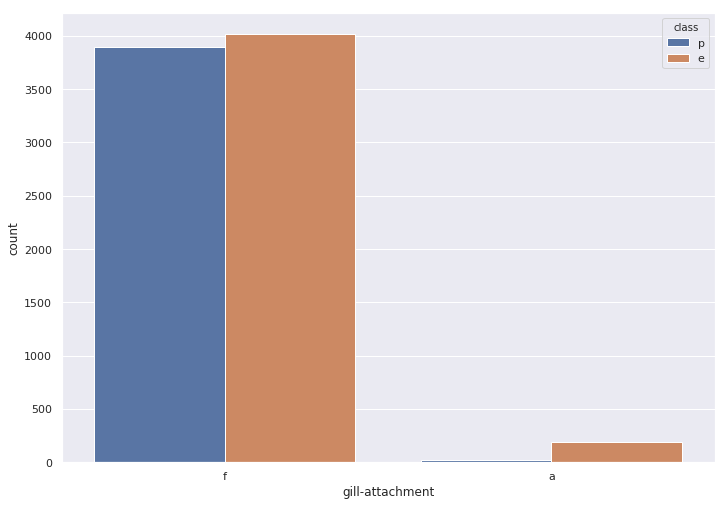

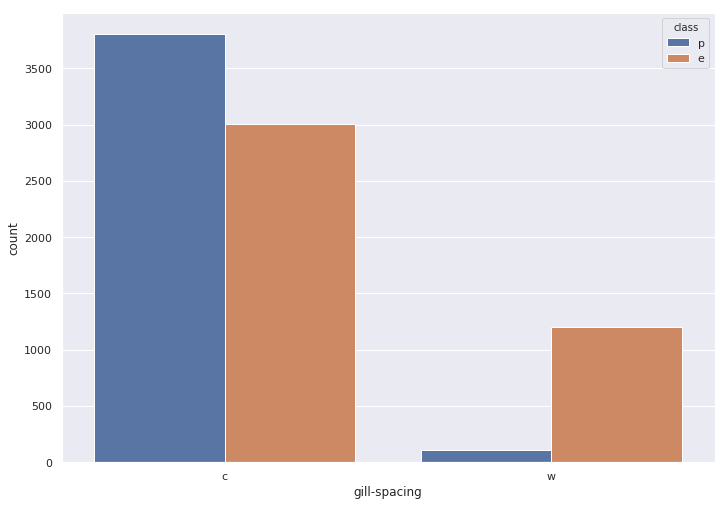

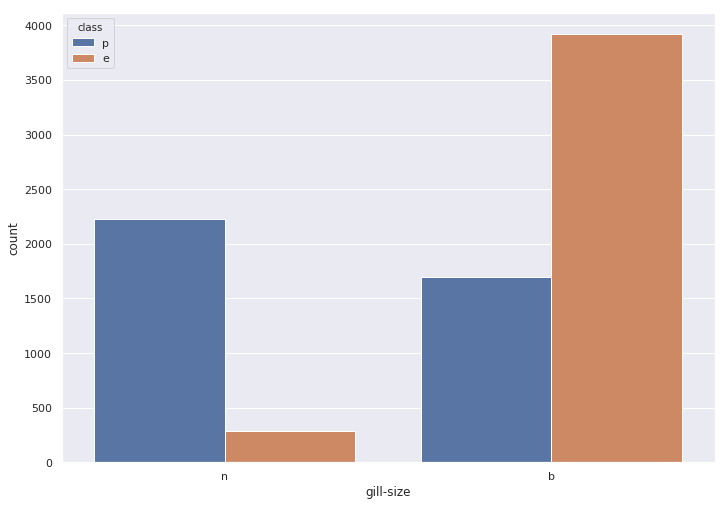

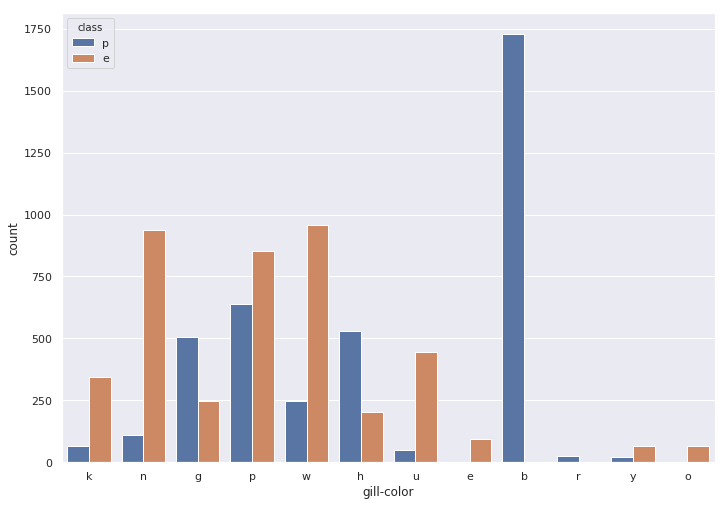

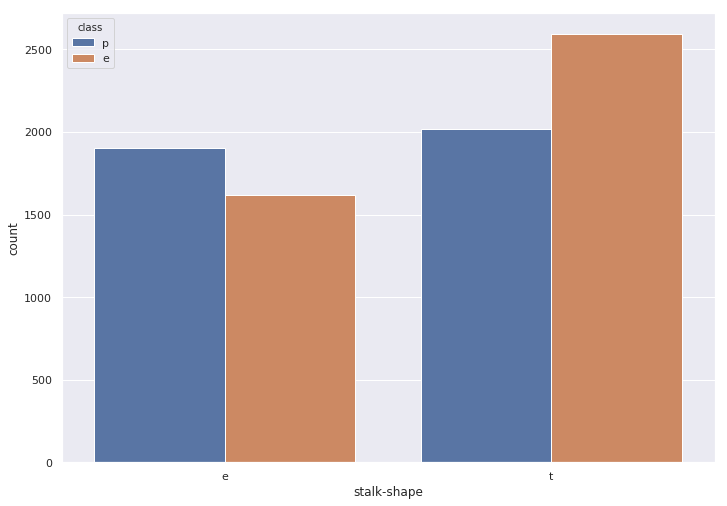

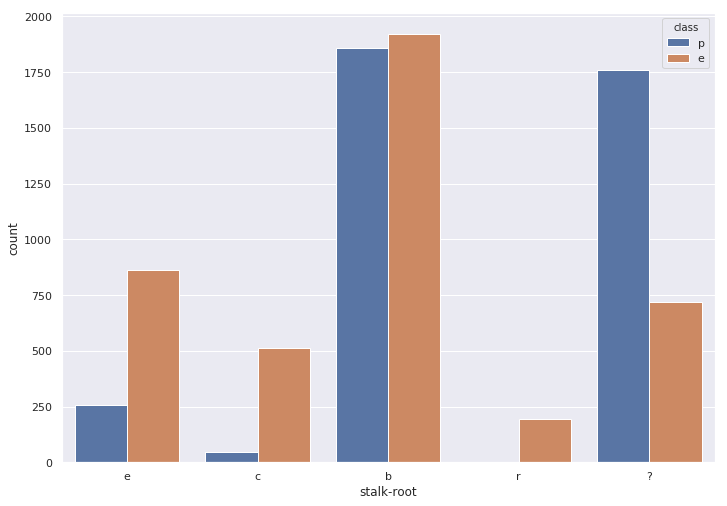

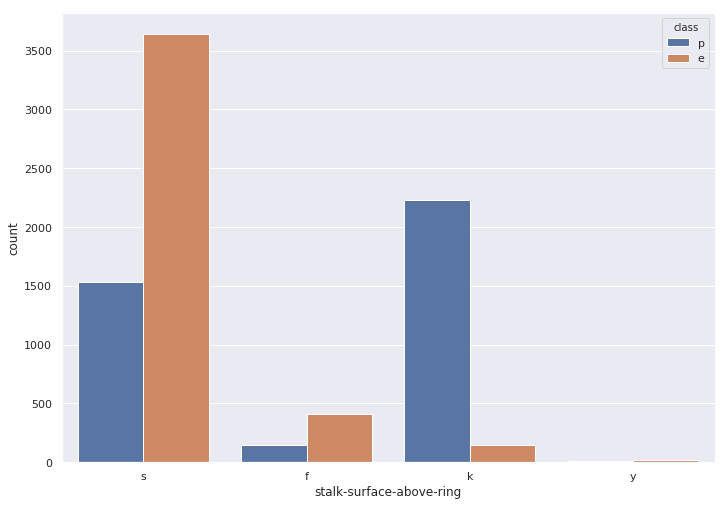

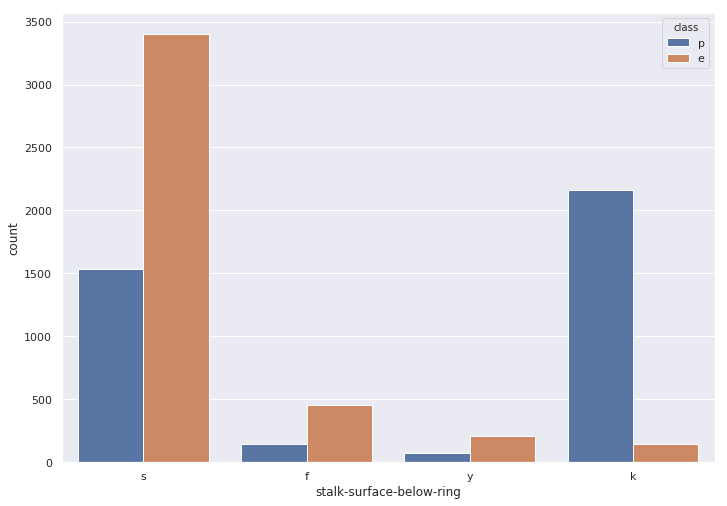

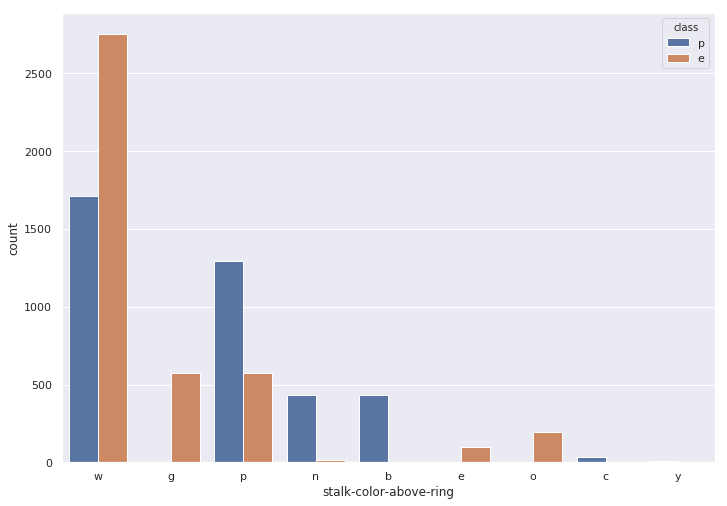

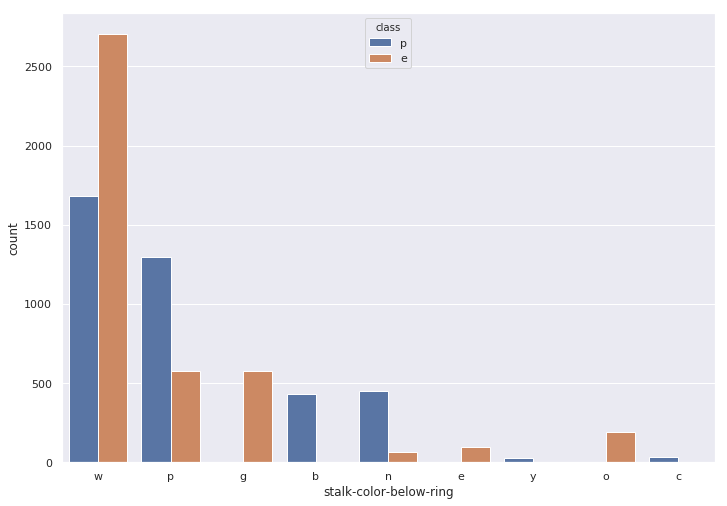

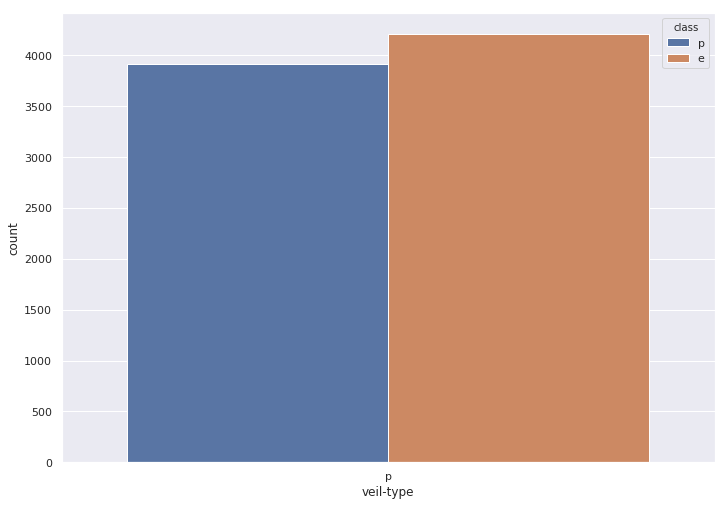

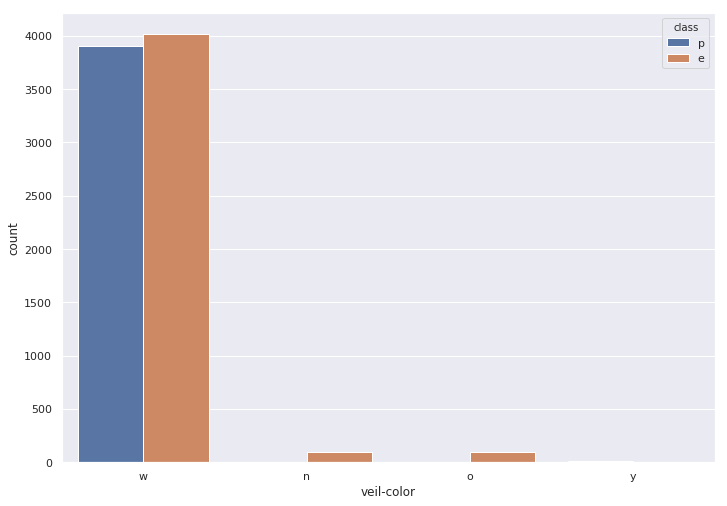

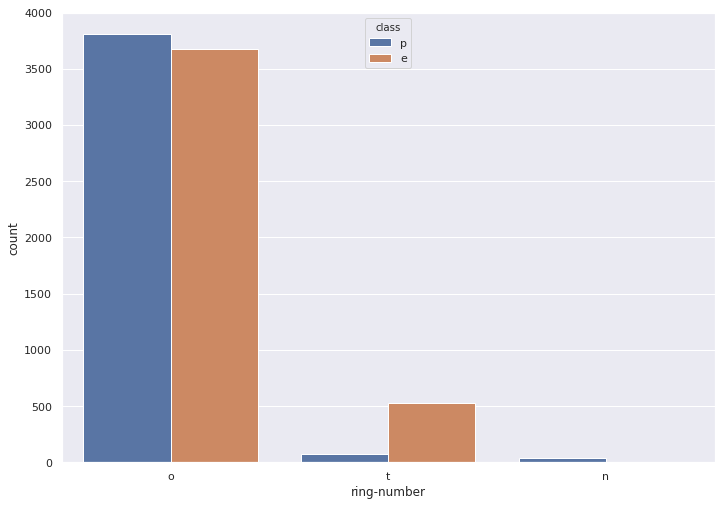

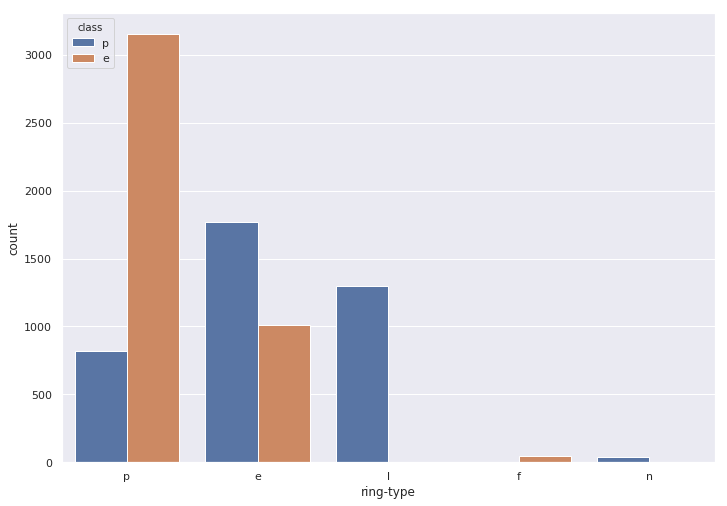

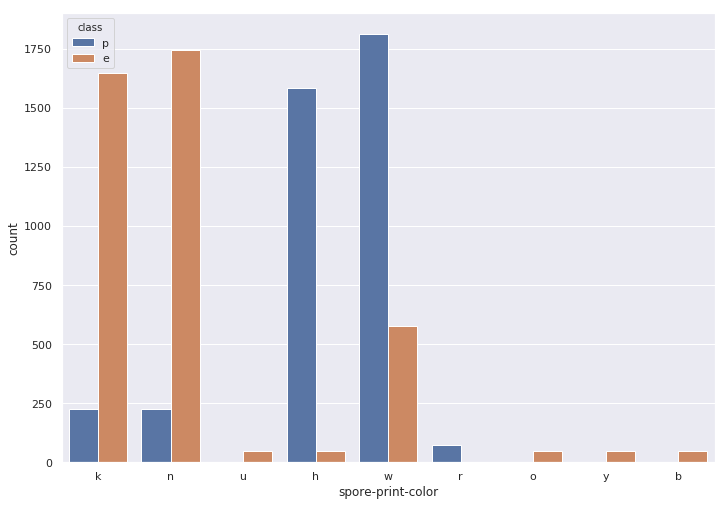

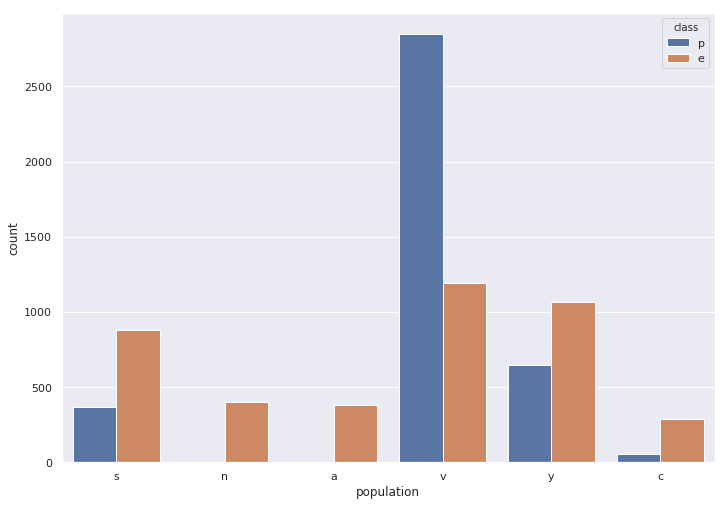

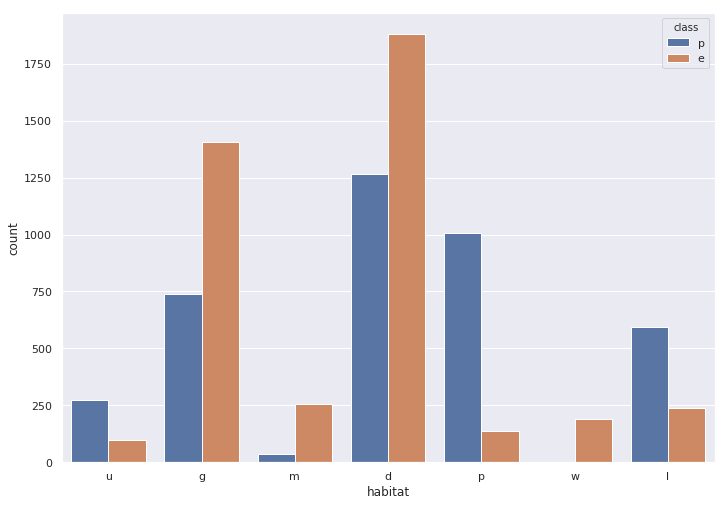

In [592]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.countplot(x=data[col], hue=hue, data=data)
        
hue = df['class']
df_plot = df.drop('class', 1)
plot_data(hue, df)